# NBA Trends


In this project, we’ll analyze data from the NBA (National Basketball Association) and explore possible associations.

This data was originally sourced from 538’s Analysis of the Complete History Of The NBA and contains the original, unmodified data from [Basketball Reference](https://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. Read more about data [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo).

For this project we’ve limited the data to just 5 teams and 10 columns (plus one constructed column, point_diff, the difference between pts and opp_pts).

In [64]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# setting options
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress=True, precision = 2)

In [39]:
# load nba games data
nba = pd.read_csv('nba_games.csv', sep=',')

In [40]:
# inspecting data
nba.head(10)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5
5,194611090DTF,1947,Celtics,Falcons,A,0,46,69,L,0.386818,-23
6,194611110NYK,1947,Knicks,Stags,H,0,68,78,L,0.629479,-10
7,194611130CHS,1947,Celtics,Stags,A,0,61,71,L,0.291740,-10
8,194611140STB,1947,Celtics,Bombers,A,0,62,64,L,0.313890,-2
9,194611160BOS,1947,Celtics,Huskies,H,0,53,49,W,0.602702,4


In [43]:
# which columns do we have?
print(nba.shape)
nba.columns

(24359, 11)


Index(['game_id', 'year_id', 'fran_id', 'opp_fran', 'game_location',
       'is_playoffs', 'pts', 'opp_pts', 'game_result', 'forecast',
       'point_diff'],
      dtype='object')

In [41]:
# inspecting the data types and count missing values
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


#### Analyzing relationships between Quant and Categorical

In [ ]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba['year_id'] == 2010]
nba_2014 = nba[nba['year_id'] == 2014]

In [51]:
# create two series that represent the points each team has scored in their games (Knicks and Nets)
knicks_pts_10 = nba_2010.pts[nba_2010['fran_id'] == "Knicks"]
nets_pts_10 = nba_2010.pts[nba_2010['fran_id'] == "Nets"]

In [79]:
# knicks average points
knicks_pts_10_mean= np.round(knicks_pts_10.mean(), 2)
# nets average points
nets_pts_10_mean = np.round(nets_pts_10.mean(), 2)

print(f"Knicks average points in 2010: {knicks_pts_10_mean}")
print(f"Nets average points in 2010: {nets_pts_10_mean}")

Knicks average points in 2010: 102.11
Nets average points in 2010: 92.38


In [62]:
# the difference between the two teams’ average points
diff_means_2010 = np.round(knicks_pts_10_mean - nets_pts_10_mean, 2)
# print the results
print(f"The difference between the Knicks and Nets teams average points in 2019 season is: {diff_means_2010} points")

The difference between the Knicks and Nets teams average points in 2019 season is: 9.73 points


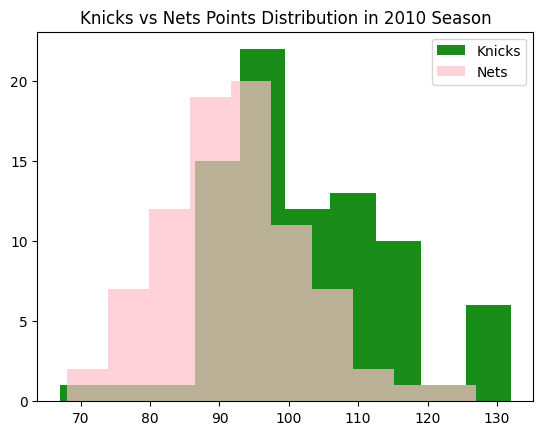

In [78]:
# Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets
# knicks points histogram
plt.hist(knicks_pts_10, color='green', label='Knicks', density=False, alpha=0.9)
# nets points histogram
plt.hist(nets_pts_10, color='pink', label='Nets', density=False, alpha=0.7)
plt.legend()
plt.title('Knicks vs Nets Points Distribution in 2010 Season')
plt.show()

- The Knicks generally scored more points than the Nets.
- The Nets were less productive, often scoring around 90 points.
- The distributions differ in shape and center, which indicates a difference in playing styles or scoring performance.